In [1]:
#from utilities.processingTools import *
#from utilities.matchingUtilities import *
#from utilities.processingTools import *
#from utilities.matchingUtilities import *
#from utilities.matchingPlusPlus import *

from utilities.utilitiesPlusPlus_v1 import *
#from utilities.histUtilities import *
import joblib
import pandas as pd

from MLtools.xgb_plusplus import *
#from MLtools.xgb import *
#from MLtools.xgb_roc import *
#from MLtools.neuralNetwork import *
#from MLtools.xgb_plots import *
#from MLtools.diMuonShape import *
#rom MLtools.diMuonBkg import *

In [2]:
# Constants
root_file = 'ROOT_Files/MZD_200_ALL/MZD_200_55.root'
root_dir  = 'cutFlowAnalyzerPXBL4PXFL3;1/Events;1'
dRcut     = 0.05 
cut       = "all" # cut type ("all" applies cuts to every observable)

data = processData("mc") # declare data processing object
data.extractData(root_file, root_dir)
data.prelimCuts()
data.removeBadEvents("all")
data.dRgenCalc()
data.SSM()
data.dRcut(dRcut, cut)
data.permutations()
data.invMassCalc()
data.dR_diMu()
data.permutations()
data.invMassCalc()
data.dR_diMu()
final_array = data.fillAndSort(save = True)
#final_array = data.fillFinalArray()




************************************************************
Extracting data from MZD_200_55.root
************************************************************


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11742/11742 [00:01<00:00, 8978.22it/s]





************************************************************
Generating all permutations
************************************************************


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10778/10778 [00:00<00:00, 341214.99it/s]





************************************************************
Calculating the invariant mass for all permutations
************************************************************


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10778/10778 [00:00<00:00, 14891.76it/s]





************************************************************
Generating all permutations
************************************************************


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10778/10778 [00:00<00:00, 317899.12it/s]





************************************************************
Calculating the invariant mass for all permutations
************************************************************


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10778/10778 [00:00<00:00, 14963.23it/s]





************************************************************
Filling final array
************************************************************


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10778/10778 [00:00<00:00, 11704.38it/s]


AttributeError: 'processData' object has no attribute 'file_name'

/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)





************************************************************
Splitting data into train/test datasets
************************************************************



************************************************************
Building the XGBoost model and training
************************************************************
[14:44:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



Training Classification Report:

               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      5380
         1.0       0.90      0.92      0.91      2704

    accuracy                           0.94      8084
   macro avg       0.93      0.94      0.93      8

/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 94.03%


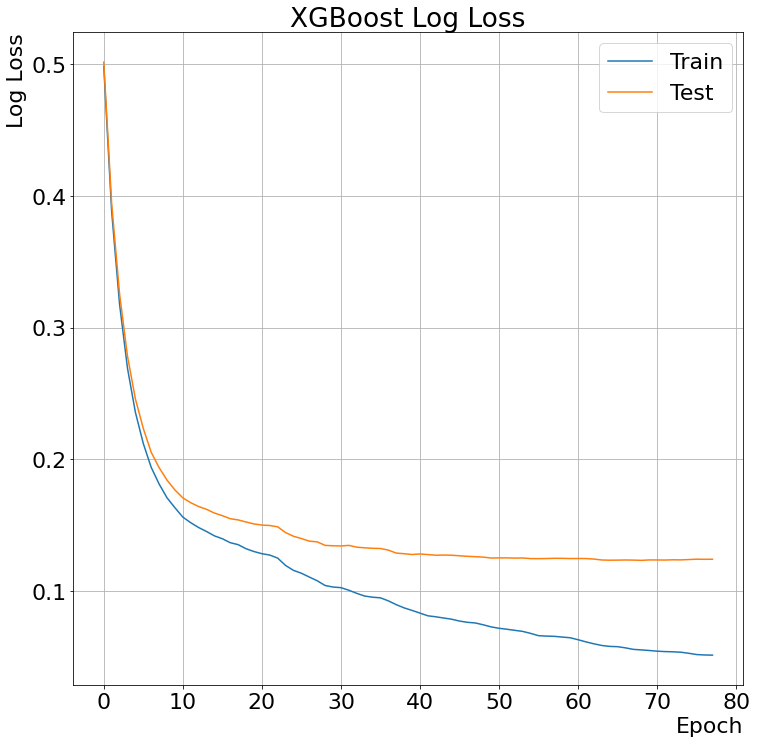

/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14:44:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




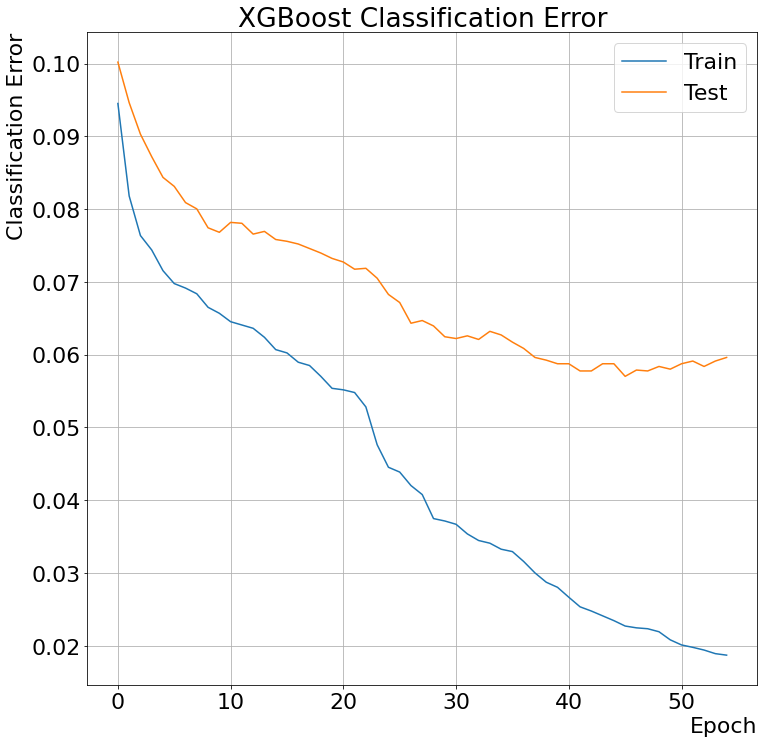




************************************************************
Plotting correctly and incorrectly matched muons
************************************************************


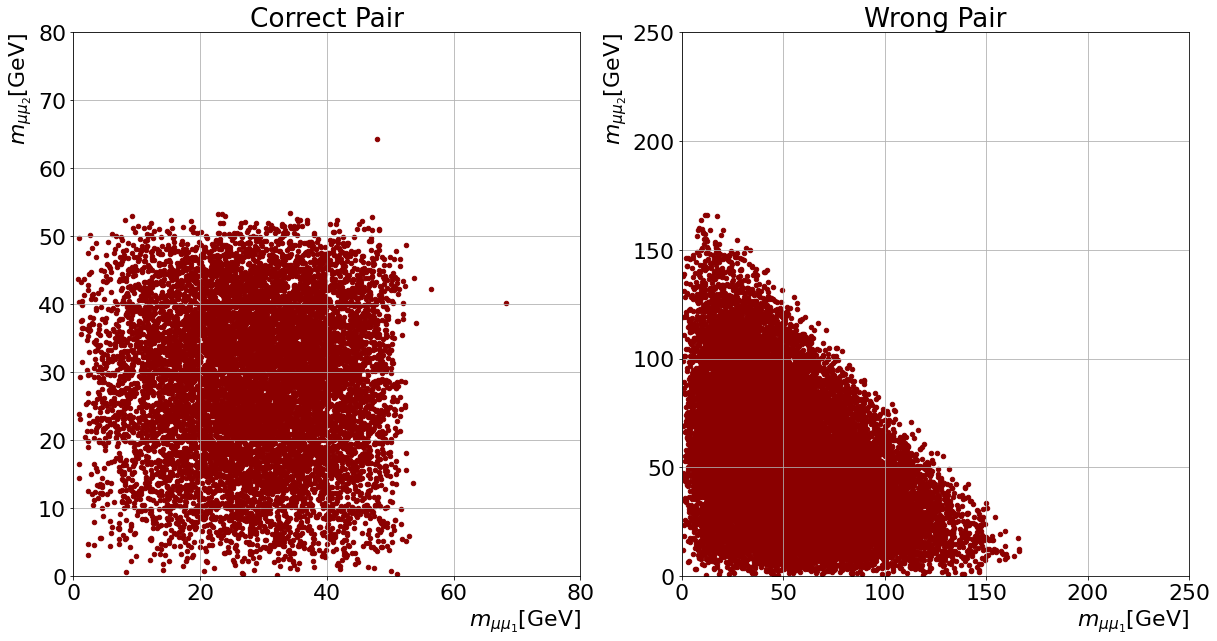

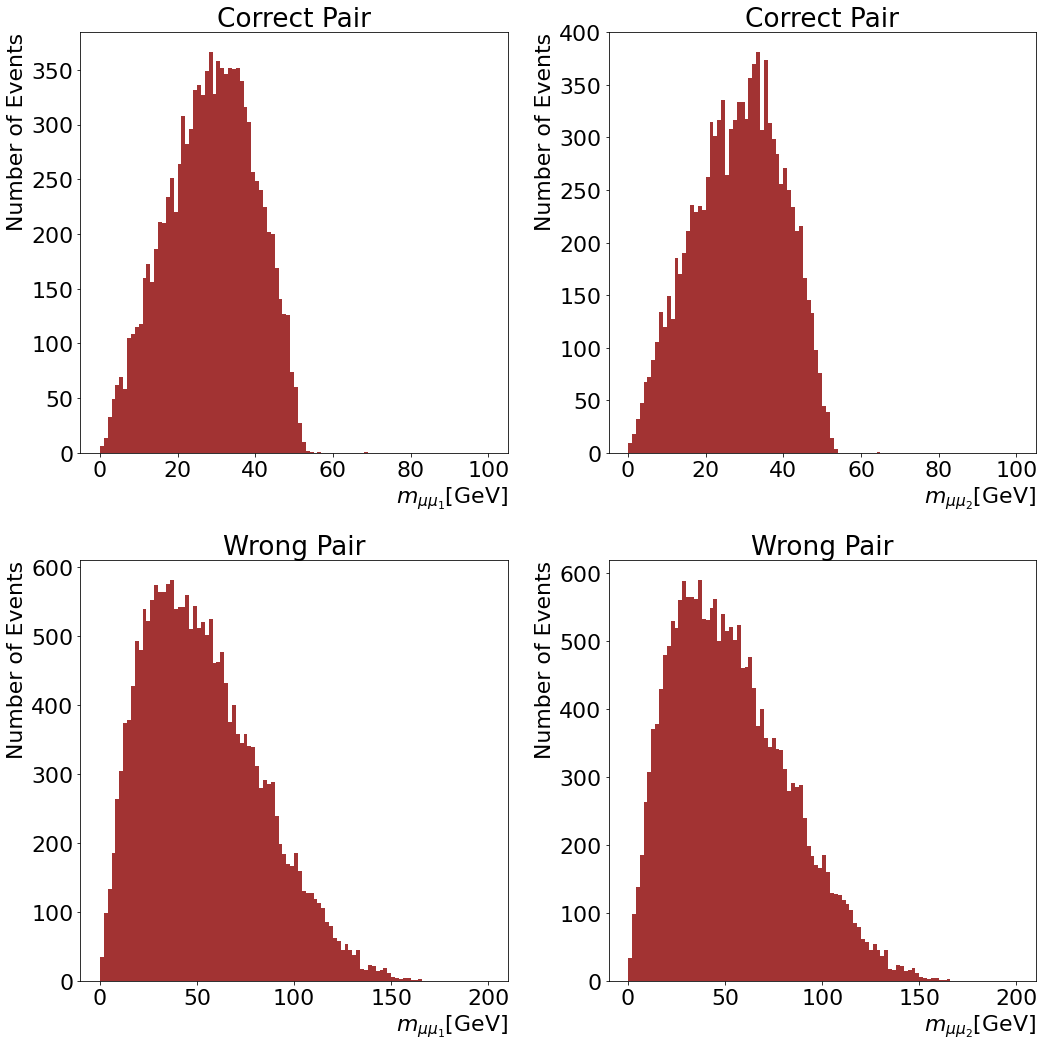

In [3]:
xgboost = xgb("mc")
xgboost.split(final_array)
_ = xgboost.xgb(single_pair = True, ret = True)
xgboost.plotMatch()

In [4]:
del xgboost

In [6]:
root_file_list_bkg = ["MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_qqToZZTo4L.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_ggToZZTo4mu.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_ggHToZZTo4L.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_TTJets_DiLept.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_DY0J.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_DY1J.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_DY2J.root",
                ]
root_dir    = "DataAboveUpsilonCRSR"
dRcut       = 0.05 
cut         = "all" # cut type ("all" applies cuts to every observable)
verboseBool = False
singlePair  = True

In [7]:
all_bkg = {} # initialize dictionary
key = []
for ii in range(len(root_file_list_bkg)):
    temp = root_file_list_bkg[ii].split('_')[-1]
    key.append(temp.split('.')[0])
    print(key[ii])
    if singlePair:
        all_bkg[key[ii]] = {"full": None, "single": None}
    else:
        all_bkg[key[ii]] = None

qqToZZTo4L
ggToZZTo4mu
ggHToZZTo4L
DiLept
DY0J
DY1J
DY2J


In [8]:
for file in range(len(root_file_list_bkg)):
    data = processData("bkg") # declare data processing object
    data.extractData(root_file_list_bkg[file], root_dir, verbose = verboseBool)
    data.prelimCuts(verbose = verboseBool)
    data.removeBadEvents("all", verbose = verboseBool)
    data.matchBkgMu(verbose = verboseBool)
    data.permutations()
    data.invMassCalc(verbose = verboseBool)
    data.dR_diMu(verbose = verboseBool)
    if singlePair:
        all_bkg[key[file]]["full"] = data.fillAndSort()
    else:
        all_bkg[key[file]] = data.fillAndSort()
    
    del data # clean up memory




************************************************************
Extracting data from DataAboveUpsilonCRSR_sample_qqToZZTo4L.root
************************************************************



************************************************************
Generating all permutations
************************************************************
Renaming sel mu arrays


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11792/11792 [00:00<00:00, 317152.08it/s]





************************************************************
Calculating the invariant mass for all permutations
************************************************************


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11792/11792 [00:01<00:00, 11107.54it/s]





************************************************************
Filling final array
************************************************************


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11792/11792 [00:00<00:00, 12852.08it/s]


Returning final array



************************************************************
Extracting data from DataAboveUpsilonCRSR_sample_ggToZZTo4mu.root
************************************************************



************************************************************
Generating all permutations
************************************************************
Renaming sel mu arrays


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27359/27359 [00:00<00:00, 389712.32it/s]





************************************************************
Calculating the invariant mass for all permutations
************************************************************


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27359/27359 [00:02<00:00, 10376.69it/s]





************************************************************
Filling final array
************************************************************


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27359/27359 [00:01<00:00, 13888.26it/s]


Returning final array



************************************************************
Extracting data from DataAboveUpsilonCRSR_sample_ggHToZZTo4L.root
************************************************************



************************************************************
Generating all permutations
************************************************************
Renaming sel mu arrays


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11417/11417 [00:00<00:00, 277004.77it/s]





************************************************************
Calculating the invariant mass for all permutations
************************************************************


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11417/11417 [00:01<00:00, 11394.77it/s]





************************************************************
Filling final array
************************************************************


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11417/11417 [00:00<00:00, 12857.10it/s]


Returning final array



************************************************************
Extracting data from DataAboveUpsilonCRSR_sample_TTJets_DiLept.root
************************************************************



************************************************************
Generating all permutations
************************************************************
Renaming sel mu arrays


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 55107.64it/s]





************************************************************
Calculating the invariant mass for all permutations
************************************************************


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 7204.94it/s]





************************************************************
Filling final array
************************************************************


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 6312.45it/s]

Returning final array



************************************************************
Extracting data from DataAboveUpsilonCRSR_sample_DY0J.root
************************************************************





************************************************************
Generating all permutations
************************************************************
Renaming sel mu arrays


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 41890.68it/s]





************************************************************
Calculating the invariant mass for all permutations
************************************************************


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 6902.78it/s]





************************************************************
Filling final array
************************************************************


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1569.87it/s]

Returning final array



************************************************************
Extracting data from DataAboveUpsilonCRSR_sample_DY1J.root
************************************************************





************************************************************
Generating all permutations
************************************************************
Renaming sel mu arrays


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 67489.98it/s]





************************************************************
Calculating the invariant mass for all permutations
************************************************************


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 8091.60it/s]





************************************************************
Filling final array
************************************************************


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 3636.80it/s]

Returning final array



************************************************************
Extracting data from DataAboveUpsilonCRSR_sample_DY2J.root
************************************************************





************************************************************
Generating all permutations
************************************************************
Renaming sel mu arrays


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 88487.43it/s]





************************************************************
Calculating the invariant mass for all permutations
************************************************************


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 8150.21it/s]





************************************************************
Filling final array
************************************************************


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 3186.50it/s]

Returning final array


In [5]:
all_bkg[key[0]]

{'full': array([[46.12388992, 40.23752594, 13.23219013, ..., 92.29906201,
         17.45026408,  1.        ],
        [13.23219013, 40.23752594, 46.12388992, ..., 40.26194988,
         46.75058664,  0.        ],
        [46.12388992,  9.84333038, 13.23219013, ..., 46.75058664,
         40.26194988,  0.        ],
        ...,
        [18.88294983, 24.87996292, 25.65677643, ..., 27.76500774,
         12.85567813,  1.        ],
        [10.19303703, 24.87996292, 25.65677643, ..., 33.42591932,
         40.8440481 ,  0.        ],
        [18.88294983, 25.65677643, 24.87996292, ..., 40.8440481 ,
         33.42591932,  0.        ]]),
 'single': None}




************************************************************
Loading trained XGBoost model from MZD_200_55_pd_model.sav
************************************************************



************************************************************
Determining correct and wrong pairs for the qqToZZTo4L dataset
************************************************************



************************************************************
Plotting correctly and incorrectly matched muons
************************************************************



************************************************************
Loading trained XGBoost model from MZD_200_55_pd_model.sav
************************************************************



************************************************************
Determining correct and wrong pairs for the ggToZZTo4mu dataset
************************************************************



************************************************************
Plotting correctl

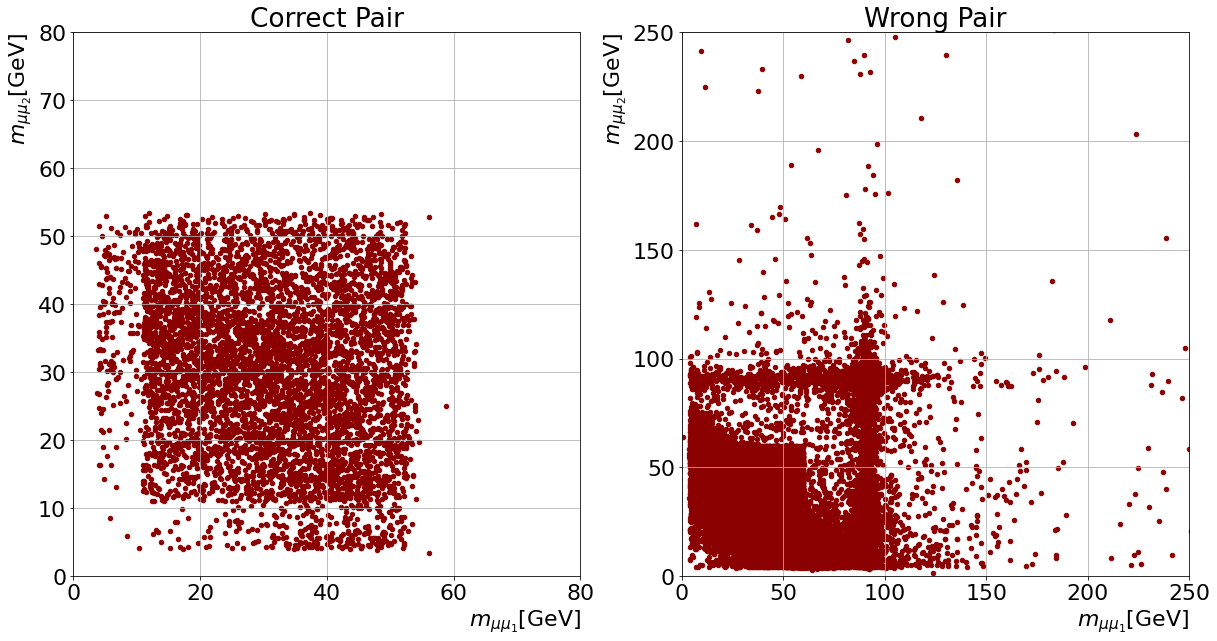

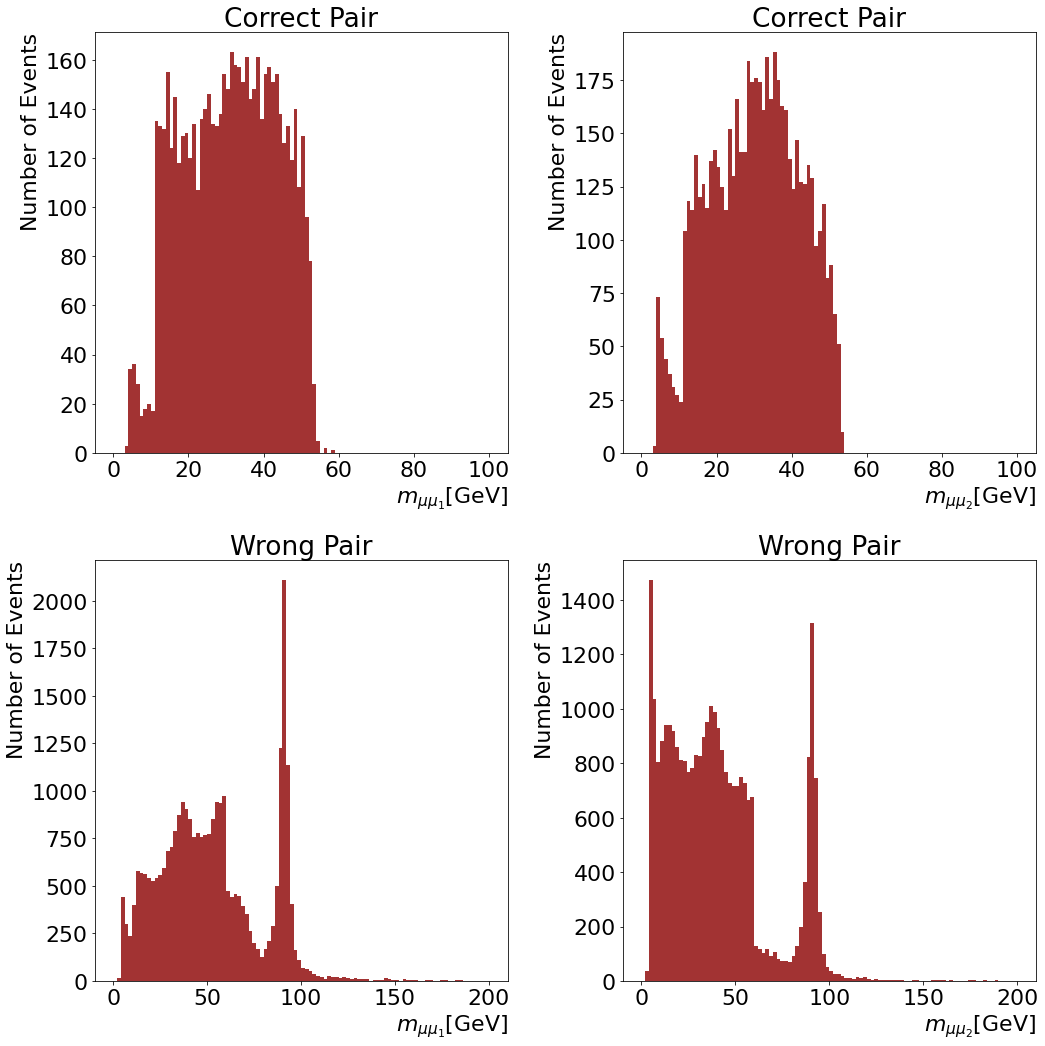

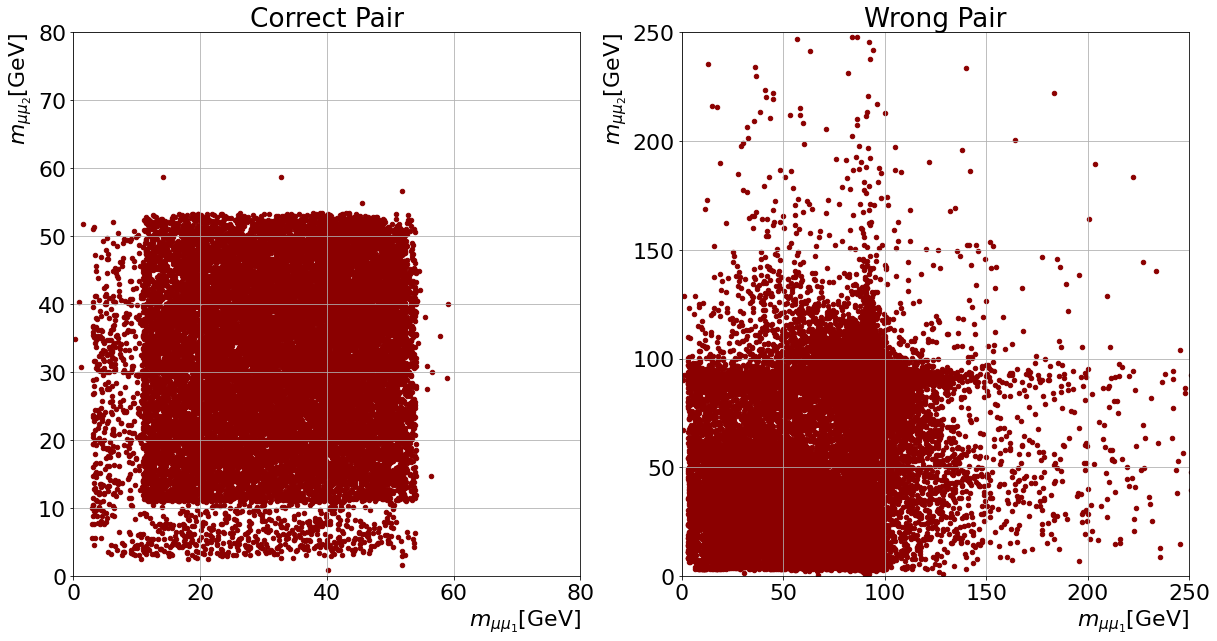

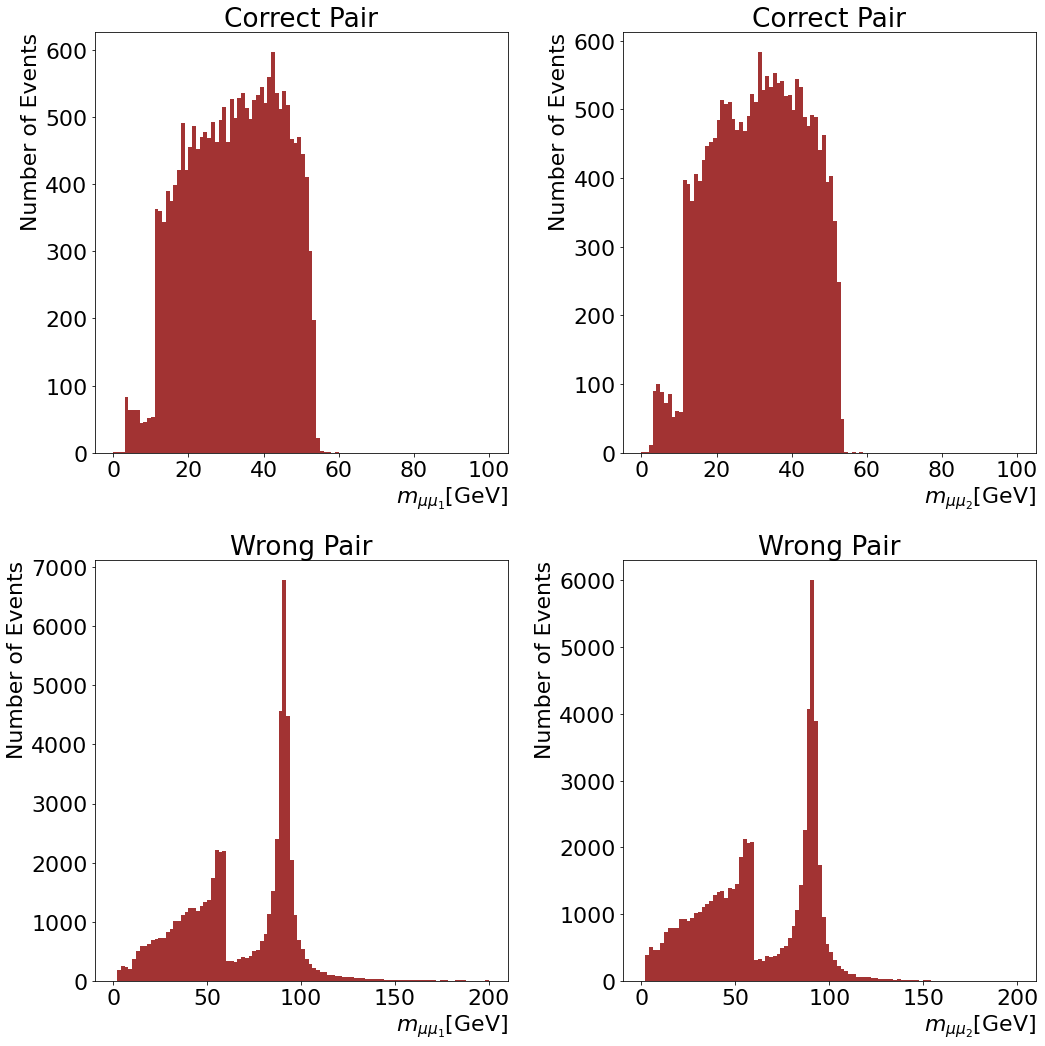

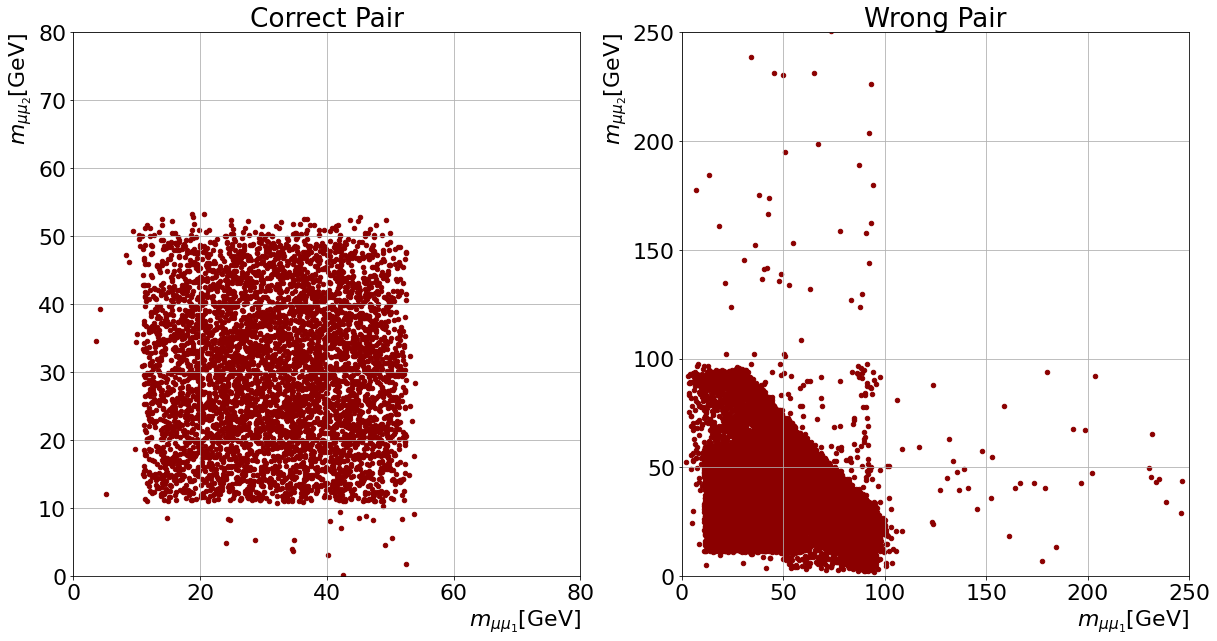

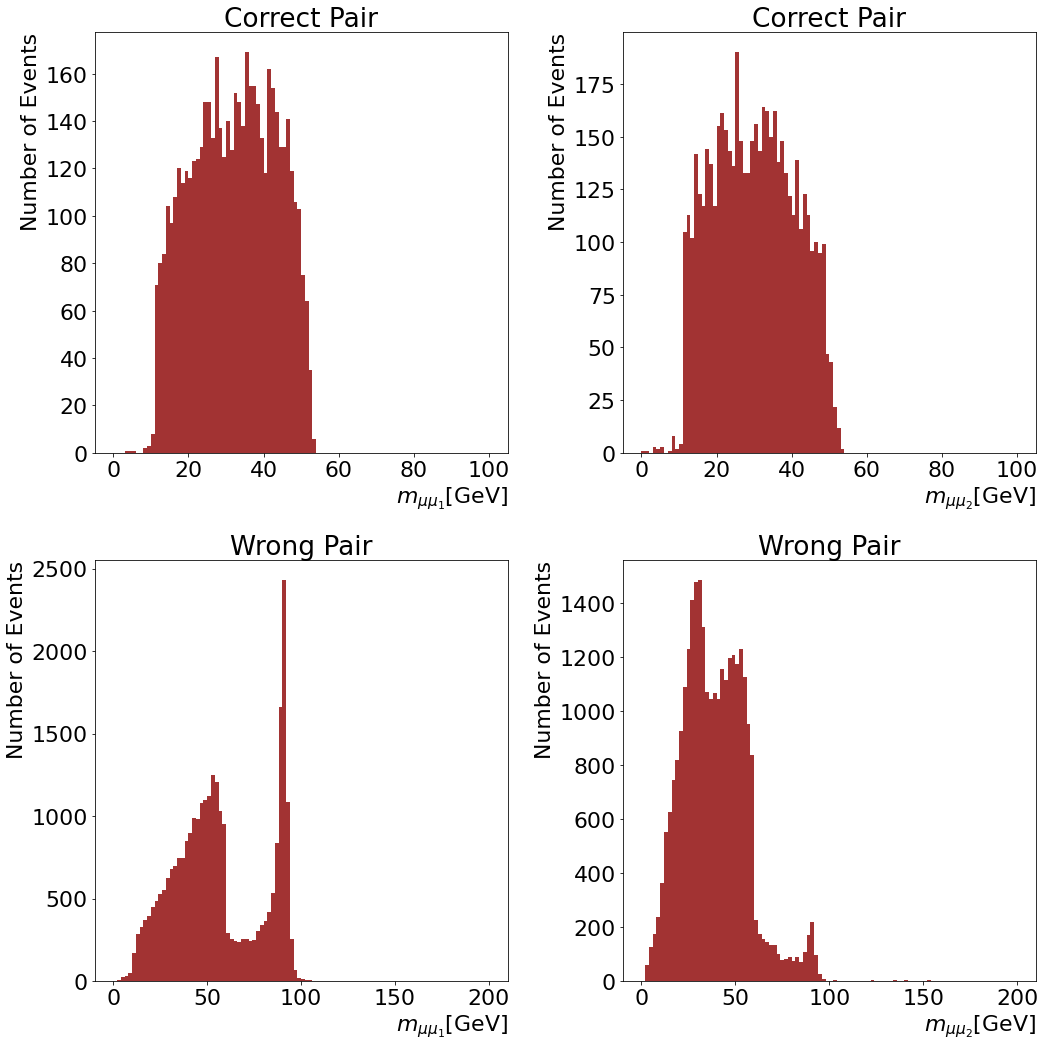

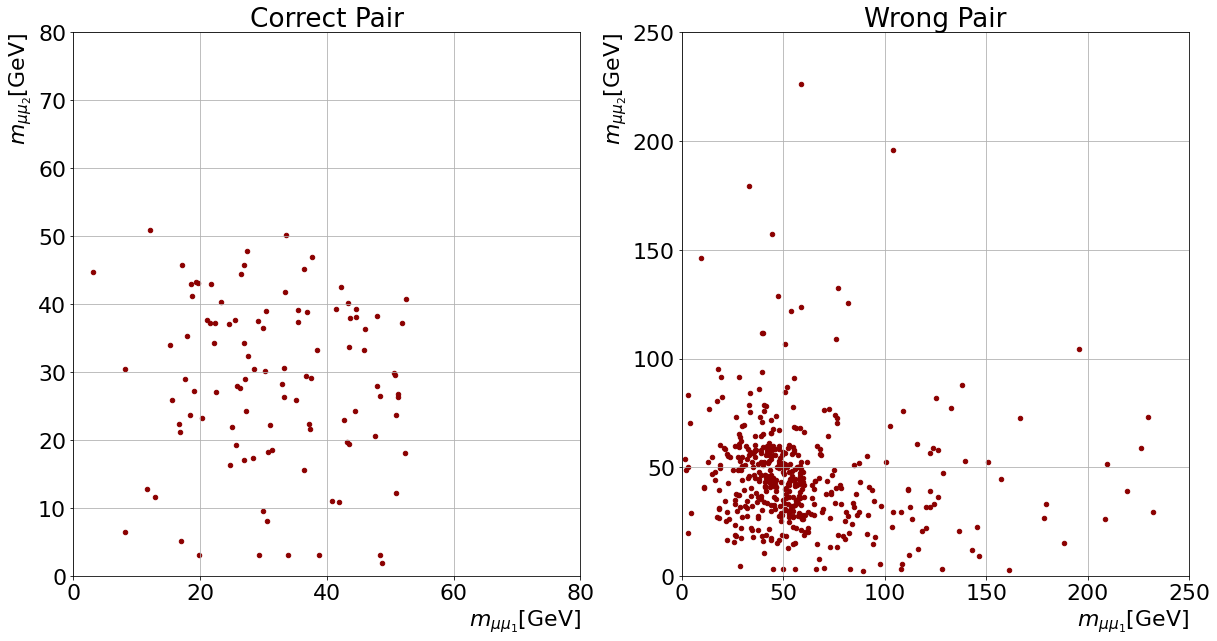

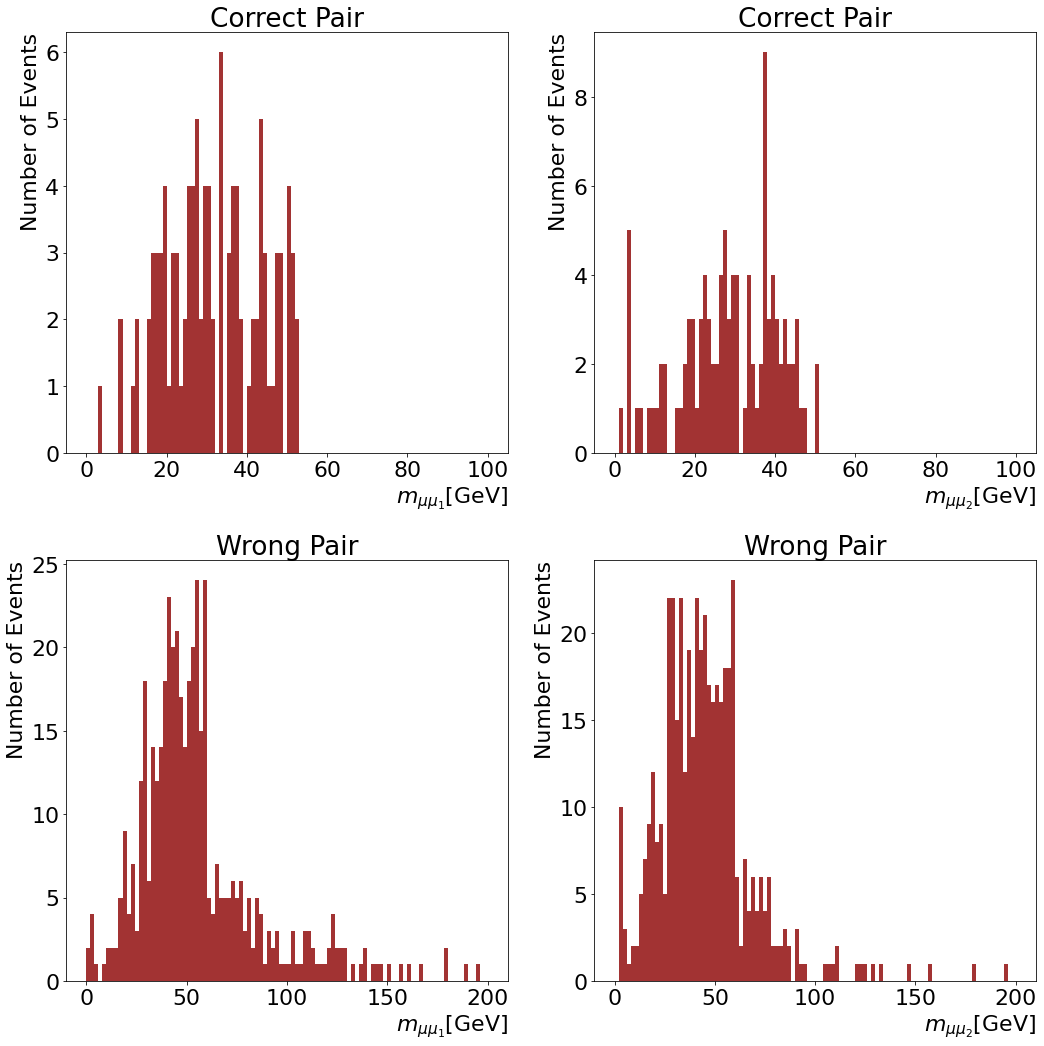

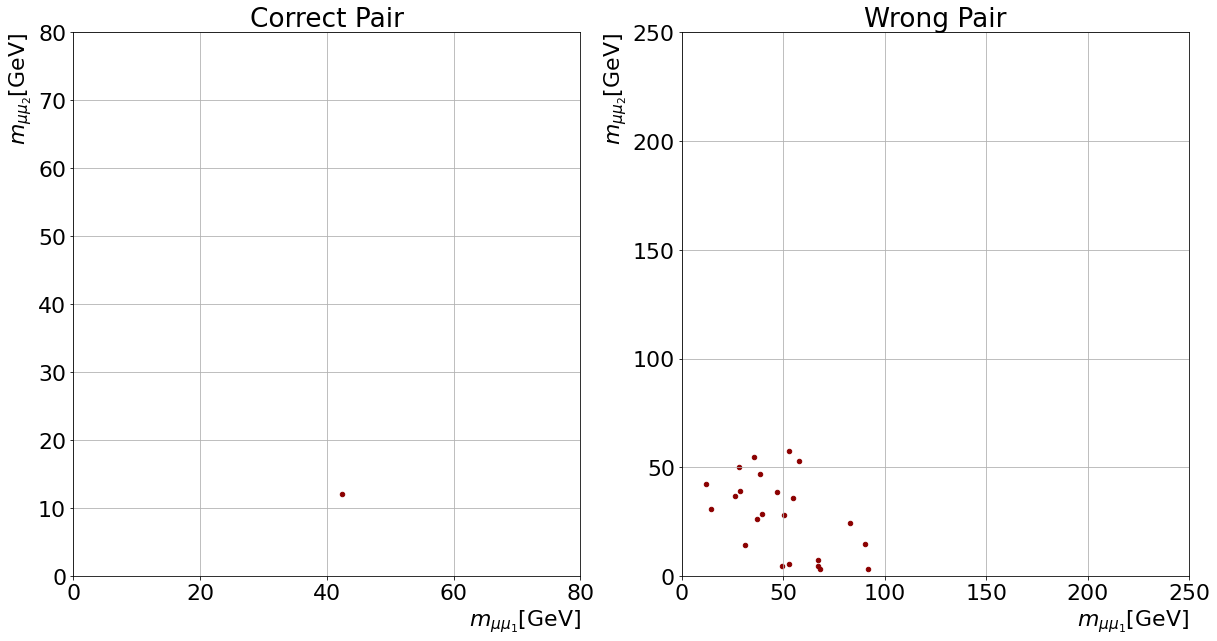

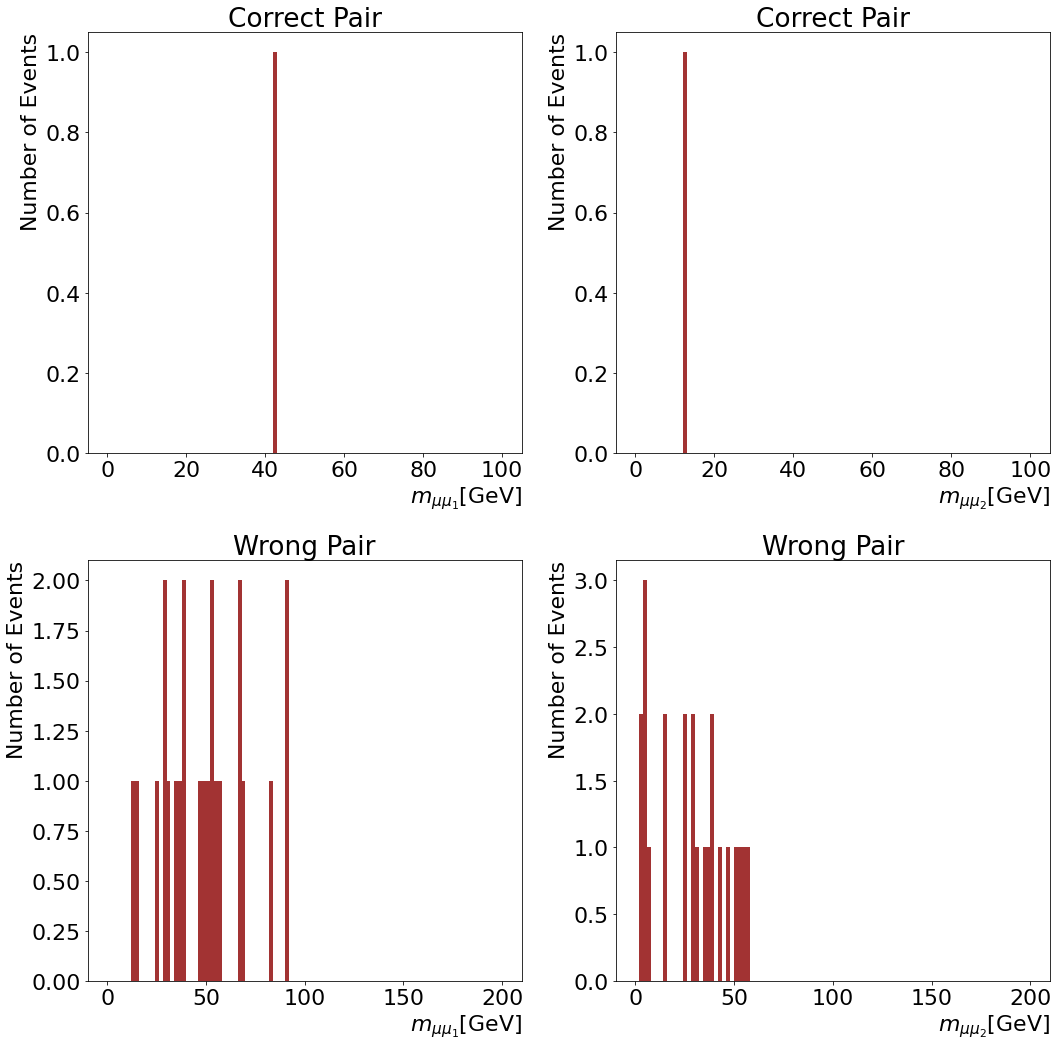

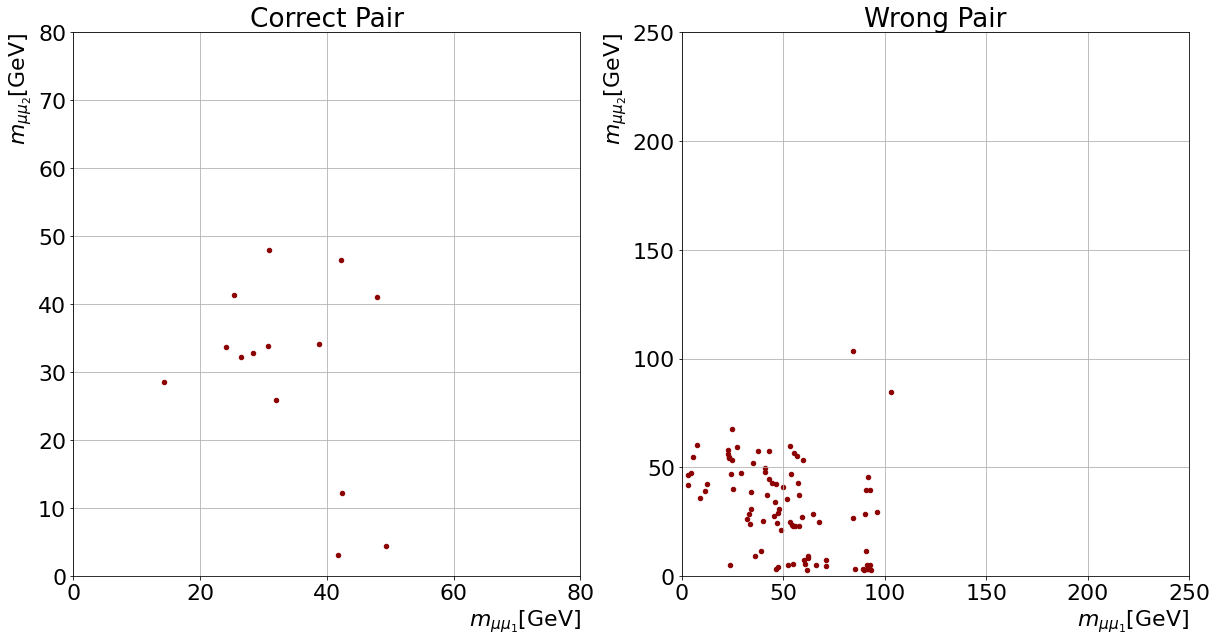

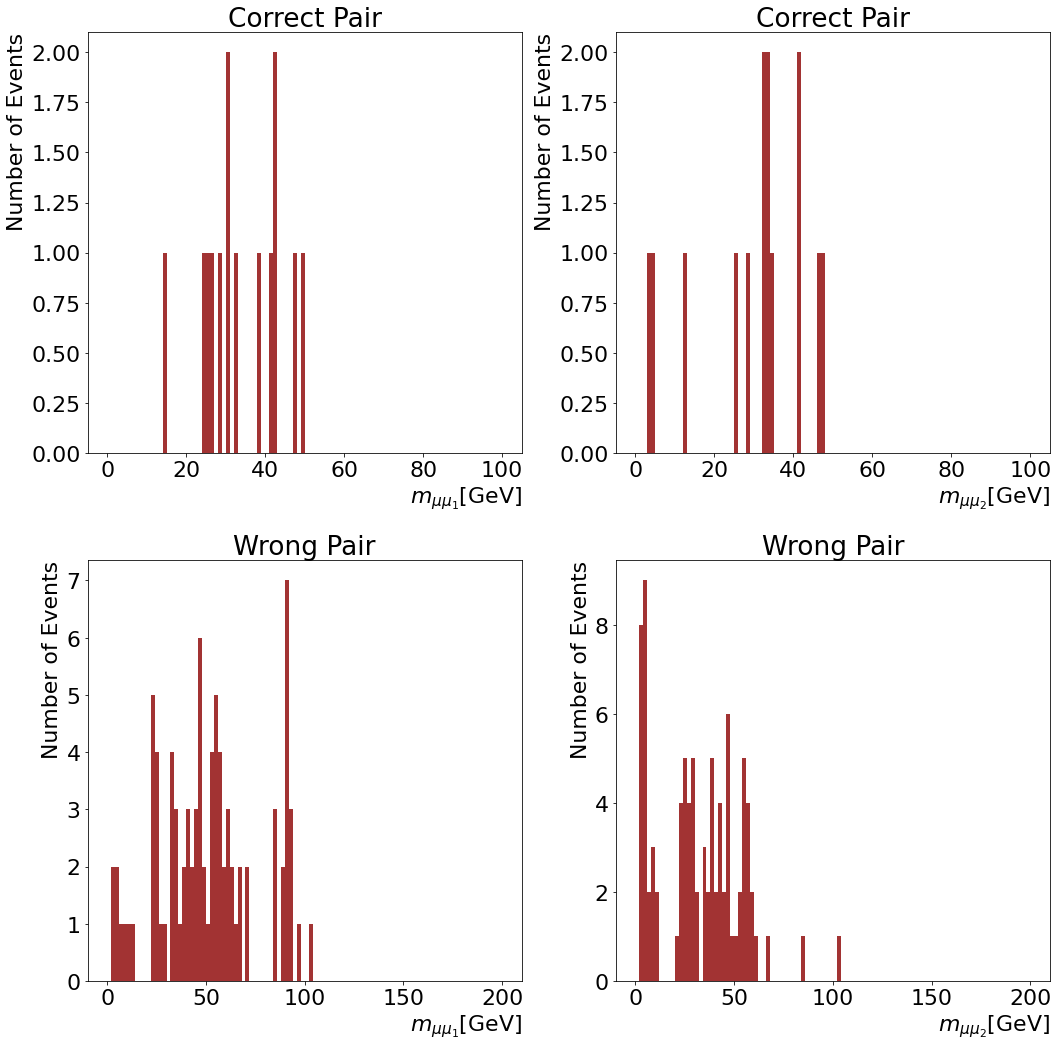

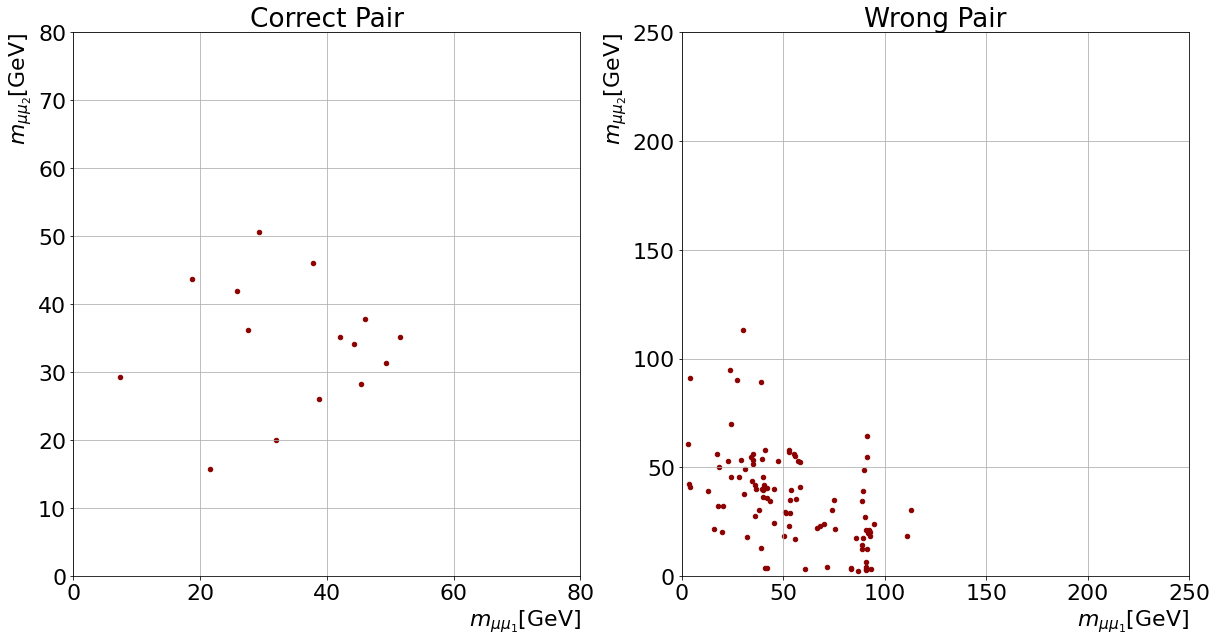

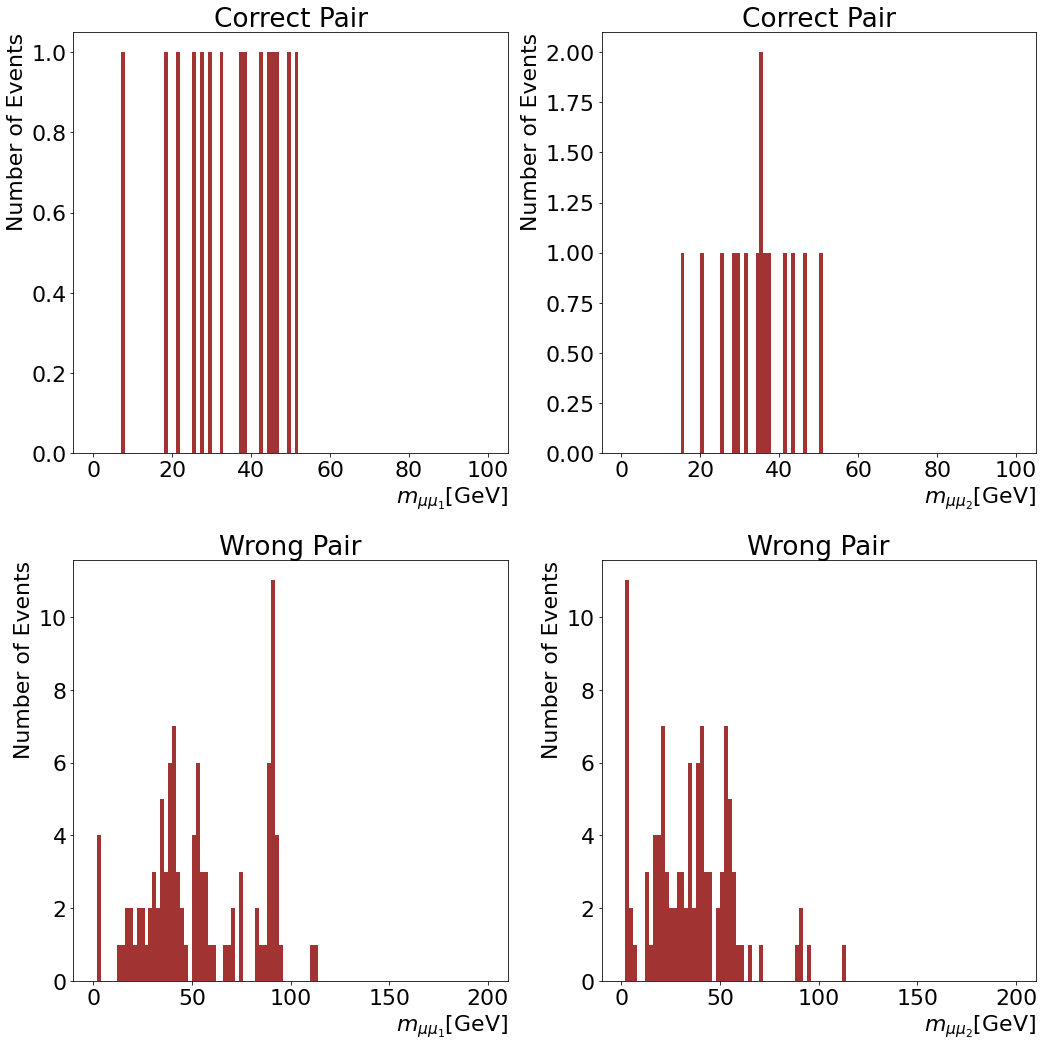

In [9]:
for file in range(len(root_file_list_bkg)):
    xgboost = xgb("bkg", key[file])
    if singlePair:
        all_bkg[key[file]]["single"] = xgboost.predict(all_bkg[key[file]]["full"], single_pair = singlePair, ret = True)
    else:
        xgboost.predict(all_bkg[key[file]])
    xgboost.plotMatch()

In [7]:
all_bkg[key[0]]["single"]["invMassA0"].to_numpy()

array([47.79021001, 33.17060029, 45.2704011 , ..., 36.09543622,
       12.51434101, 27.76500774])

In [8]:
keylist = list(all_bkg.keys())

In [9]:
keylist

['qqToZZTo4L', 'ggToZZTo4mu', 'ggHToZZTo4L', 'DiLept', 'DY0J', 'DY1J', 'DY2J']

In [36]:
order = [4, 5, 6, 0, 3, 2, 1]

In [37]:
mylist = [keylist[ii] for ii in order]

In [38]:
mylist

['DY0J', 'DY1J', 'DY2J', 'qqToZZTo4L', 'DiLept', 'ggHToZZTo4L', 'ggToZZTo4mu']

In [ ]:
# The order is important here: DY 0J, 1J, 2J, ZZTo4L, TTJets_DiLept, ggHToZZTo4L, ggToZZTo4mu

In [21]:
# get number of events for each dataset
numEvents = []
for key in keylist:
    numEvents.append(all_bkg[key]["single"].shape[0])

In [45]:
diMuonKey = {}

In [6]:
all_bkg["qqToZZTo4L"]["single"]["invMassA0"]

3        47.790210
11       33.170600
18       45.270401
25       29.266935
38       11.943877
           ...    
35331    13.454013
35363    43.816186
35369    36.095436
35370    12.514341
35373    27.765008
Name: invMassA0, Length: 4794, dtype: float64

In [46]:
for key in mylist:
    diMuonKey[key] = {invKeys[0]: None, invKeys[1]: None} 

In [ ]:
sf = np.array([3.4145686E+00, 6.2974242E-01, 3.5720940E-01, 4.1624890E-03, 1.0998854E-01, 7.6245783E-04, 1.1110732E-04])
w = sf

In [1]:
root_file_list_bkg = ["MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_qqToZZTo4L.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_ggToZZTo4mu.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_ggHToZZTo4L.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_TTJets_DiLept.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_DY0J.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_DY1J.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_DY2J.root",
                ]
root_dir    = "DataAboveUpsilonCRSR"

In [6]:
from matplotlib import cm
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LogNorm

global numBins
global hist_range
global scale_factors
global plot_order
global color_list

global dataDir

numBins          = 17
hist_range    = (0, 60) 
scale_factors = {
"DY0J"        : 3.4145686E+00,
"DY1J"        : 6.2974242E-01,
"DY2J"        : 3.5720940E-01, 
"qqToZZTo4L"  : 4.1624890E-03,
"DiLept"      : 1.0998854E-01,
"ggHToZZTo4L" : 7.6245783E-04,
"ggToZZTo4mu" : 1.1110732E-04
}
plot_order = ["DY0J", "DY1J", "DY2J", "qqToZZTo4L", "DiLept", "ggHToZZTo4L", "ggToZZTo4mu"]
color_list = {
"DY0J"        : "darkkhaki", 
"DY1J"        : "mediumaquamarine",
"DY2J"        : "lightslategrey",
"qqToZZTo4L"  : "slateblue",
"DiLept"      : "mediumseagreen",
"ggHToZZTo4L" : "cyan",
"ggToZZTo4mu" : "magenta"}

dataDir = "dataframes/"

In [107]:
plt.rcParams.update({'font.size': 24}) # Increase font size

class histogram:
    def __init__(self, file_name = None):
        print("Initialized")
        
    def import_csv(self, csv_type):
        
        if csv_type == "single":
            single_correct_pair_all = {} # initialize dictionary
            for ii in range(len(plot_order)):
                temp_file = dataDir + plot_order[ii] + "/single_correct_pair_%s.csv" % plot_order[ii]
                single_correct_pair_all[plot_order[ii]] = pd.read_csv(temp_file)
            
            self.from_csv_single = True
            return single_correct_pair_all
            
        
    def import_correctPairs(self, dictionary, reorder = True):
        
        if self.from_csv_single:
            keyList = list(dictionary.keys()) 

            self.diMuonKey = []
            for pair in range(2):
                self.diMuonKey.append("invMassA%i" % pair)

            self.invMass = {}
            for key in keyList:
                self.invMass[key] = {"invMassA0": None, "invMassA1": None}

                for pair in range(2):
                    self.invMass[key][self.diMuonKey[pair]] = dictionary[key][self.diMuonKey[pair]].to_numpy()
        else:
            keyList = list(dictionary.keys()) 

            self.diMuonKey = []
            for pair in range(2):
                self.diMuonKey.append("invMassA%i" % pair)

            self.invMass = {}
            for key in keyList:
                self.invMass[key] = {"invMassA0": None, "invMassA1": None}

                for pair in range(2):
                    self.invMass[key][self.diMuonKey[pair]] = dictionary[key]["single"][self.diMuonKey[pair]].to_numpy()

    def create_hist(self, sf = True, verbose = False):
        self.histData = {}
    
        for key in plot_order:
            self.histData[key] = {self.diMuonKey[0]: None, self.diMuonKey[1]: None}

            for pair in self.diMuonKey:
                temp_hist, temp_bins = np.histogram(self.invMass[key][pair], bins = numBins, range = hist_range, weights=None, density=None)

                self.histData[key][pair] = {"hist": temp_hist, "bins": temp_bins}
                
        if sf:
            for key in plot_order:
                for pair in self.diMuonKey:
                    if verbose:
                        print("Applying scale factor of %f to %s\n\n" % (scale_factors[key], key))
                    
                    self.histData[key][pair]["hist"] = self.histData[key][pair]["hist"] * scale_factors[key]
                    
    def create_hist_2d(self, sf = True, verbose = False):
        self.histData_2d = {}
    
        for key in plot_order:
            temp_hist, temp_x_edge, temp_y_edge = np.histogram2d(self.invMass[key][self.diMuonKey[0]], self.invMass[key][self.diMuonKey[1]], bins = numBins)

            self.histData_2d[key] = {"hist": temp_hist, "x_edge": temp_x_edge, "y_edge": temp_y_edge}

        if sf:
            self.total_2d_hist = 0
            for key in plot_order:
                if verbose:
                    print("Applying scale factor of %f to %s\n\n" % (scale_factors[key], key))

                self.histData_2d[key]["hist"] = self.histData_2d[key]["hist"].T * scale_factors[key]
            
                self.total_2d_hist += self.histData_2d[key]["hist"]
                    
    def plotHist(self, pair = "both"):
        mu_cnt = 1
        for pair in self.diMuonKey:
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.grid(zorder = 0)
            cnt        = 0
            
            for key in plot_order:
                #print("key: ", key)
                t_str = ""
                temp_bottom = 0
                if cnt == 0:
                    pass
                else:
                    
                    for ii in range(cnt):
                        temp_bottom += self.histData[plot_order[ii]][pair]["hist"]
                        #t_str += plot_order[ii] + " + "
                
                print(t_str)
                if pair == "invMassA0":
                    temp_string = "diMuonC_m_%s" % key
                elif pair == "invMassA1":
                    temp_string = "diMuonF_m_%s" % key
                    
                if cnt == 0:
                    plt.bar(self.histData[key][pair]["bins"][:-1], self.histData[key][pair]["hist"], width = 3.5, label = temp_string, edgecolor='black', color = color_list[key], zorder = 3)
                elif cnt >= 1:
                    plt.bar(self.histData[key][pair]["bins"][:-1], self.histData[key][pair]["hist"], width = 3.5, bottom = temp_bottom, label = temp_string, edgecolor='black', color = color_list[key], zorder = 3)
                
                cnt += 1
            
            plt.ylabel("Number of Events/3.5 GeV", fontsize = 30, loc = "top")
            plt.xlabel(r'$m_{\mu\mu_{%i}}$ [GeV]' % mu_cnt, fontsize = 30, loc = "right")
            plt.xlim(0, 60)
            plt.ylim(0, 15)
            
            leg = plt.legend(loc = 'upper left', fontsize = 20)
            leg.get_frame().set_edgecolor('b')
            plt.show()
            plt.savefig(dataDir + "all_bkg_hist_diMu_%s.pdf" % pair)
            
            mu_cnt += 1
        
    def plot2Dhist(self):
        fig = plt.figure(figsize=(10, 10))
        
        left, bottom, width, height = 0.1, 0.1, 0.65, 0.65
        bottom_h = left_h = left + width + 0.02

        rect_scatter = [left, bottom, width, height]
        rect_histx   = [left, bottom_h, width, 0.3]
        rect_histy   = [left_h, bottom, 0.3, height]

        # add the axes to the figure
        ax2d    = plt.axes(rect_scatter)
        axHistx = plt.axes(rect_histx)
        axHisty = plt.axes(rect_histy)

        # no labels for the sidecar histograms, because the 2D plot has them
        nullfmt = NullFormatter()         
        axHistx.xaxis.set_major_formatter(nullfmt)
        axHisty.yaxis.set_major_formatter(nullfmt)
        
        # the 2D plot:
        # note the all-important transpose!
        plot2d = ax2d.imshow(self.total_2d_hist, interpolation='none', origin='lower',\
        extent=[self.histData_2d["qqToZZTo4L"]["x_edge"][0], self.histData_2d["qqToZZTo4L"]["x_edge"][-1], self.histData_2d["qqToZZTo4L"]["y_edge"][0], self.histData_2d["qqToZZTo4L"]["y_edge"][-1]], aspect = 'auto', cmap = cm.plasma)
        # , norm=LogNorm()
        ax2d.set_xlabel(r"$m_{\mu\mu_{1}}$ [GeV]", loc='right')
        ax2d.set_ylabel(r"$m_{\mu\mu_{2}}$ [GeV]", loc='top')
        # mesh2 = ax2.pcolormesh(data2, cmap = cm)
        plot2d.set_clim(0, 10)
        plt.colorbar(plot2d)
        
        # the 1-D histograms: first the X-histogram
        #xhist = self.total_2d_hist.sum(axis=1) # note x-hist is axis 1, not 0
        xhist = np.sum(self.total_2d_hist, axis = 1)
        # axHistx.bar(left=xedge[:-1], height=xhist, width = xedge[1:]-xedge[:-1])
        axHistx.grid(zorder = 0)
        axHistx.bar(self.histData_2d["qqToZZTo4L"]["x_edge"][:-1], xhist, width = 3.5, zorder = 3)

        axHistx.set_xlim(0, 60) # x-limits match the 2D plot
        axHistx.set_ylim(0, 10)
        
        # axHistx.set_ylabel('Detection fraction')
        # axHistx.set_yticks([0.1, 0.4, 0.7, 1.0])

        # then the Y-histogram
        #yhist = self.histData_2d.sum(axis = 0) # note y-hist is axis 0, not 1
        yhist = np.sum(self.total_2d_hist, axis = 0)
        # use barh instead of bar here because we want a horizontal histogram
        # axHisty.barh(bottom=yedge[:-1], width=yhist, height = yedge[1:]-yedge[:-1])
        axHisty.barh(self.histData_2d["qqToZZTo4L"]["y_edge"][:-1], yhist, 3.5, zorder = 3)
        axHisty.grid(zorder = 0)
        axHisty.set_ylim(0, 60) # y-limits match the 2D plot
        axHisty.set_xlim(0, 10)

In [43]:
hist.histData_2d["qqToZZTo4L"]["y_edge"][-1]

53.39946691863849

In [108]:
hist = histogram()

Initialized


In [109]:
all_bkg = hist.import_csv("single")

In [110]:
all_bkg["DY0J"]

,Unnamed: 0,selpT0,selpT1,selpT2,selpT3,selEta0,selEta1,selEta2,selEta3,selPhi0,...,selCharge2,selCharge3,dPhi0,dPhi1,dRA0,dRA1,event,invMassA0,invMassA1,Predict
0,5,43.281834,10.42865,26.144772,10.036551,-1.330791,-1.431488,-1.373983,-0.73665,0.509329,...,-1.0,1.0,3.33727,0.368934,3.338788,0.736414,1.0,42.34191,12.064686,1.0


In [111]:
hist.import_correctPairs(all_bkg)

In [112]:
hist.create_hist()

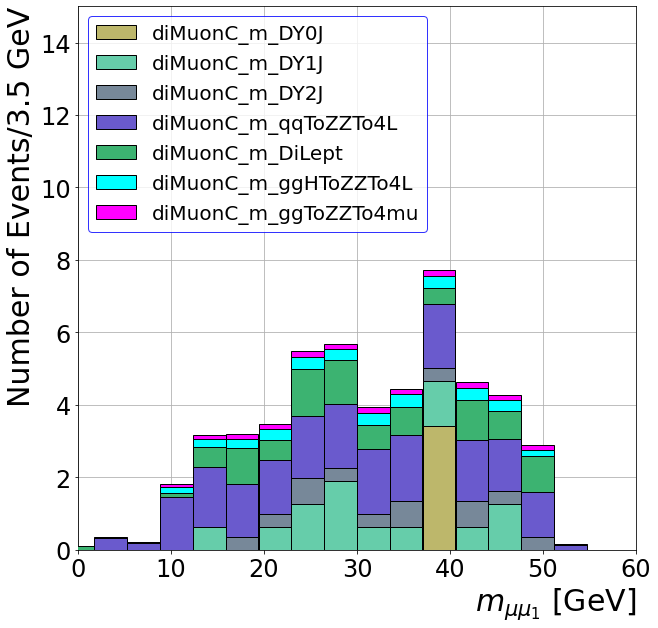

<Figure size 432x288 with 0 Axes>

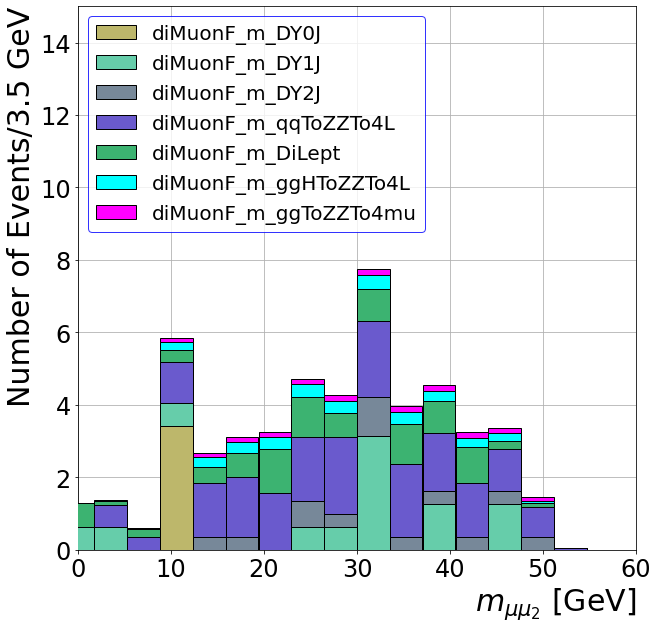

<Figure size 432x288 with 0 Axes>

In [113]:
hist.plotHist()

In [114]:
hist.create_hist_2d()

/var/folders/4m/sr9gb66d1_z22jj2m1bqj6h00000gp/T/ipykernel_53284/3522298463.py:158: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(plot2d)


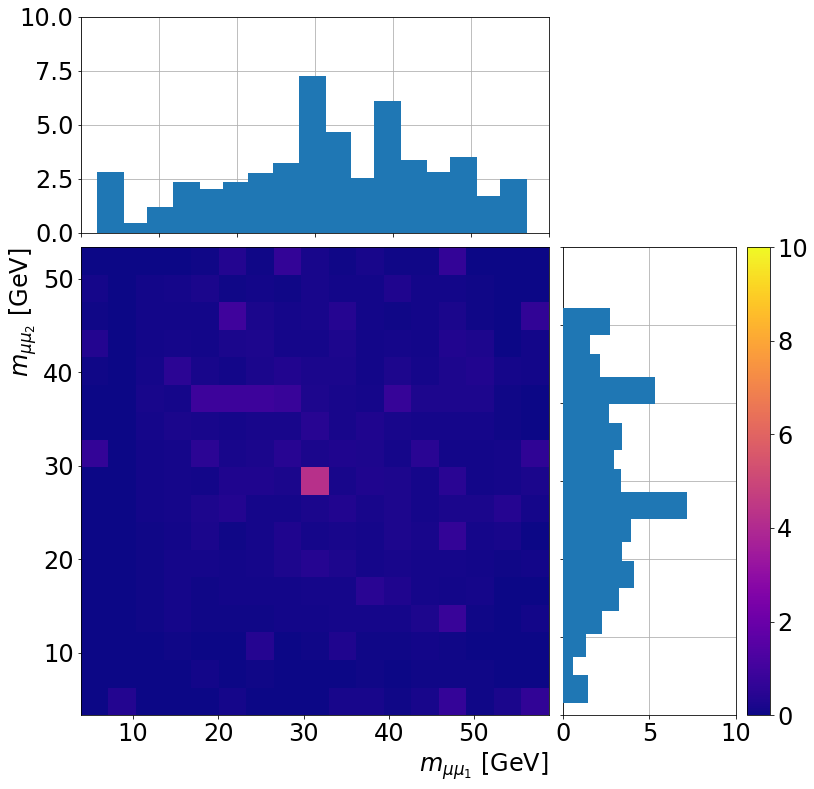

In [115]:
hist.plot2Dhist()

In [116]:
xgboost = xgb("mc")

In [117]:
xgboost

In [11]:
# Constants
root_file = "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_qqToZZTo4L.root"
root_dir  = "DataAboveUpsilonCRSR"
cut       = "all" # cut type ("all" applies cuts to every observable)

data = processData("bkg") # declare data processing object
data.extractData(root_file, root_dir)
data.prelimCuts()
data.removeBadEvents(cut)
data.matchBkgMu()
data.permutations()
data.invMassCalc()
data.dR_diMu()
final_array = data.fillAndSort()

xgboost = xgb("bkg", key[0])
xgboost.predict(final_array)
xgboost.plotMatch()

In [1]:
filename = "MZD_200_55_pd_model.sav"




************************************************************
Extracting data
************************************************************



************************************************************
Applying preliminary cuts
************************************************************



************************************************************
Removing bad events
************************************************************



************************************************************
'Matching' background muons
************************************************************



************************************************************
Generating all permutations
************************************************************
Renaming sel mu arrays


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11792/11792 [00:00<00:00, 333523.72it/s]





************************************************************
Calculating the invariant mass for all permutations
************************************************************


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11792/11792 [00:01<00:00, 7963.55it/s]





************************************************************
Calculating dPhi and dR for all permutations
************************************************************


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11792/11792 [00:00<00:00, 12620.19it/s]





************************************************************
Filling final array
************************************************************


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11792/11792 [00:00<00:00, 13010.70it/s]


Returning final array



************************************************************
Loading trained XGBoost model from MZD_200_55_pd_model.sav
************************************************************


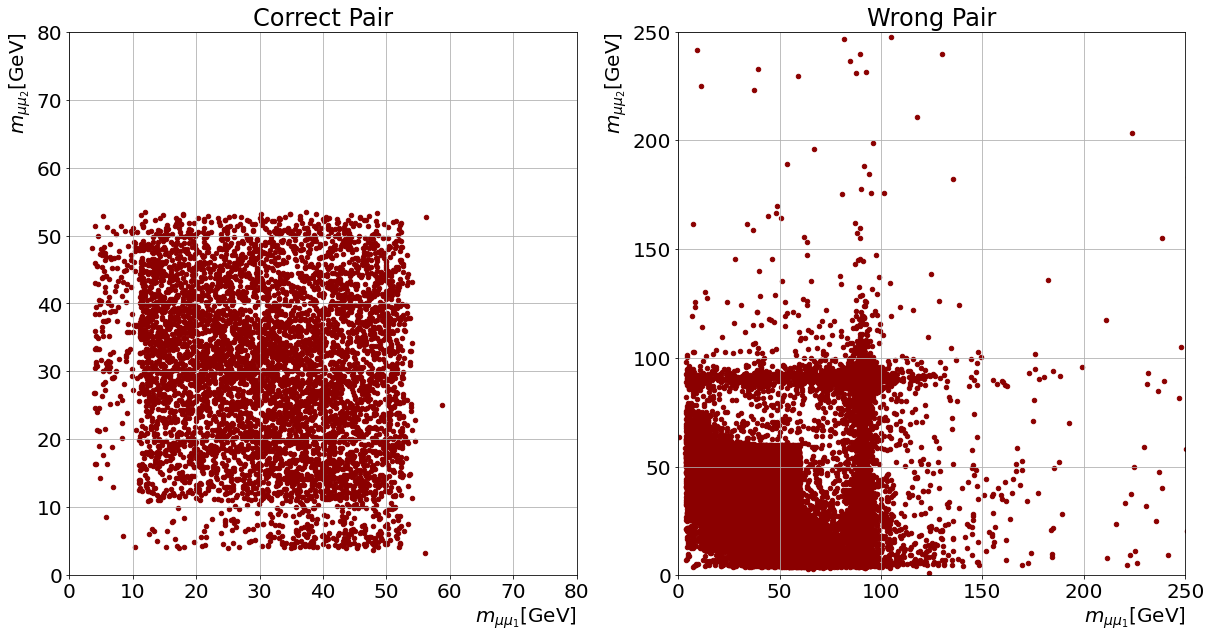

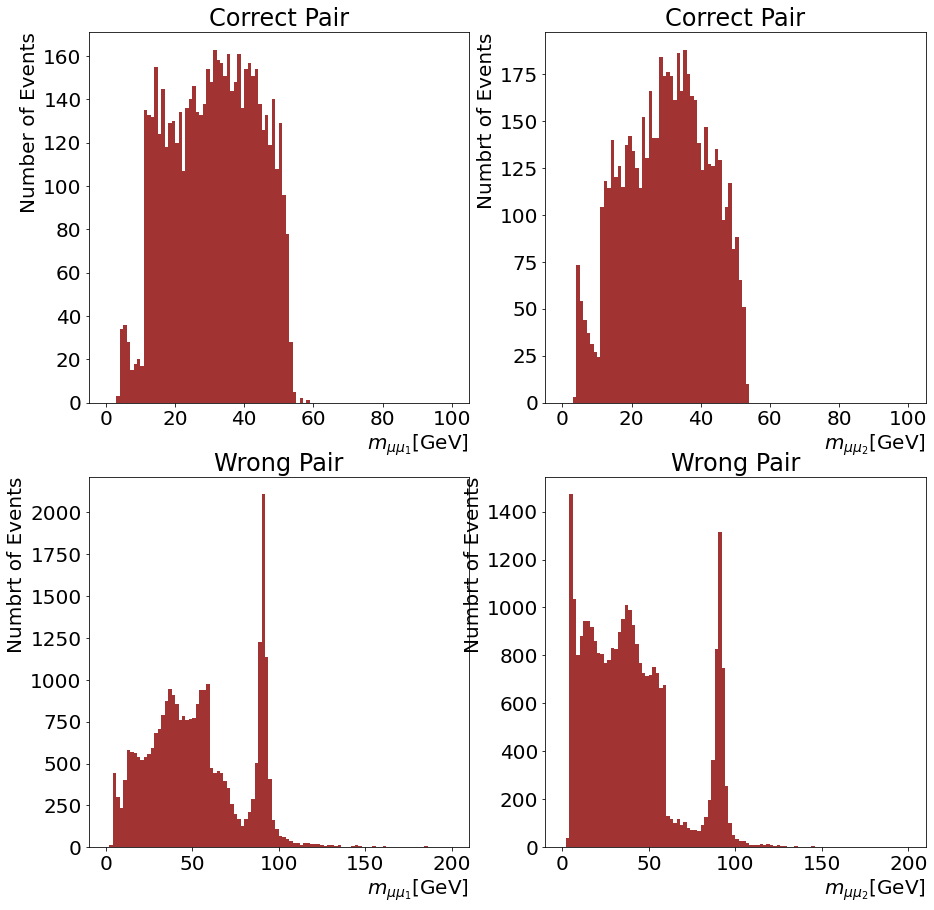

In [7]:
# Constants
root_file = "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_qqToZZTo4L.root"
root_dir  = "DataAboveUpsilonCRSR"
cut       = "all" # cut type ("all" applies cuts to every observable)

data = processData("bkg") # declare data processing object
data.extractData(root_file, root_dir)
data.prelimCuts()
data.removeBadEvents(cut)
data.matchBkgMu()
data.permutations()
data.invMassCalc()
data.dR_diMu()
final_array = data.fillAndSort()

xgboost = xgb("bkg", key[0])
xgboost.predict(final_array)
xgboost.plotMatch()

In [ ]:
xgb.correct_pair

In [ ]:
trainX, testX, trainY, testY = prepareData(final_array, 0.25, scalerType = None, returnDL = False)
model, accuracy = xgbdata(trainX, testX, trainY, testY)

In [ ]:
filename = 'MZD_200_55_model.sav'
joblib.dump(model, filename)
# load the model from disk
loaded_model = joblib.load(filename)

In [ ]:
accuracy

In [5]:
root_file_list_bkg = ["MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_qqToZZTo4L.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_ggToZZTo4mu.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_ggHToZZTo4L.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_TTJets_DiLept.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_DY0J.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_DY1J.root",
                 "MuJetAnalysis_BKGEstimation/MuJetAnalysis_BKGEstimation-test/ALL_Bkg_RootFiles/DataAboveUpsilonCRSR_sample_DY2J.root",
                ]
root_dir    = "DataAboveUpsilonCRSR"
dRcut       = 0.05 
cut         = "all" # cut type ("all" applies cuts to every observable)
verboseBool = False

In [6]:
all_bkg = {} # initialize dictionary
key = []
for ii in range(len(root_file_list_bkg)):
    temp = root_file_list_bkg[ii].split('_')[-1]
    key.append(temp.split('.')[0])
    print(key[ii])
    all_bkg[key[ii]] = {"x" : None, "y" : None}

qqToZZTo4L
ggToZZTo4mu
ggHToZZTo4L
DiLept
DY0J
DY1J
DY2J


In [16]:
all_bkg['qqToZZTo4L']['x']

In [17]:
verboseBool = False

['qqToZZTo4L', 'ggToZZTo4mu', 'ggHToZZTo4L', 'DiLept', 'DY0J', 'DY1J', 'DY2J']

In [ ]:
for file in range(len(root_file_list_bkg)):
    data = processData("bkg") # declare data processing object
    data.extractData(root_file_list_bkg[file], root_dir, verbose = verboseBool)
    data.prelimCuts(verbose = verboseBool)
    data.removeBadEvents("all", verbose = verboseBool)
    data.matchBkgMu(verbose = verboseBool)
    data.permutations()
    data.invMassCalc(verbose = verboseBool)
    data.dR_diMu(verbose = verboseBool)
    all_bkg[key[file]]["x"], all_bkg[key[file]]["y"] = data.fillAndSort()
    
    del data # clean up memory

In [ ]:
predY_ggZZ4mu = loaded_model.predict(all_bkg['qqToZZTo4L']["x"])
arr = predY_ggZZ4mu
sorted_X_ggZZ4mu['Perdict'] = arr.tolist()
#here we only have correct match for each event 
correct_pair_ggZZ4mu= sorted_X_ggZZ4mu[sorted_X_ggZZ4mu['Perdict']==1] 
print("sorted data frame for correct pairs: ")

In [ ]:
all_bkg['qqToZZTo4L']['x']

In [ ]:
for ii in range(len(root_file_list_bkg)):
    temp = root_file_list_bkg[ii].split('_')[-1]
    key  = temp.split('.')[0]
    print(key)

In [ ]:
temp = root_file_list_bkg[0].split('_')[-1]

In [ ]:
temp.split('.')[0]